In [8]:
#Text classification (Airline Sentiment)

In [9]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
Tweets = '/Users/areebafarooqui/Downloads/archive/Tweets.xls'
Tweets_df = pd.read_excel('/Users/areebafarooqui/Downloads/archive/Tweets.xls')
#print(Tweets_df.head())
print(Tweets_df.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [12]:
print(Tweets_df.describe())

           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000  


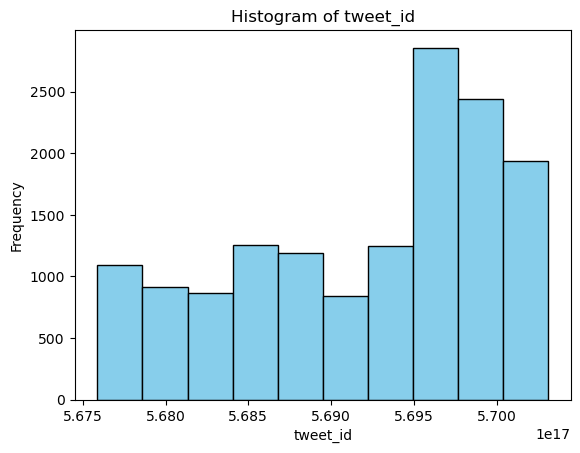

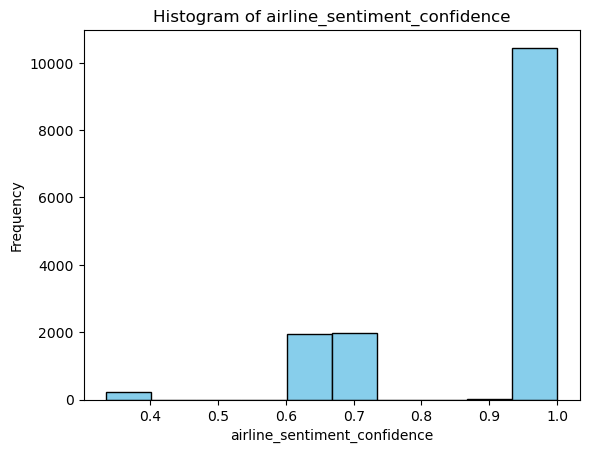

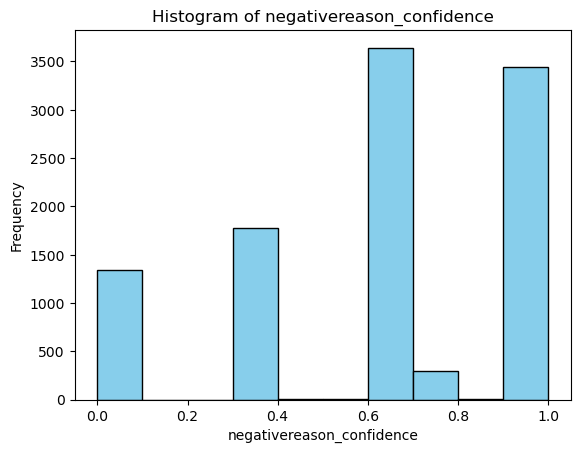

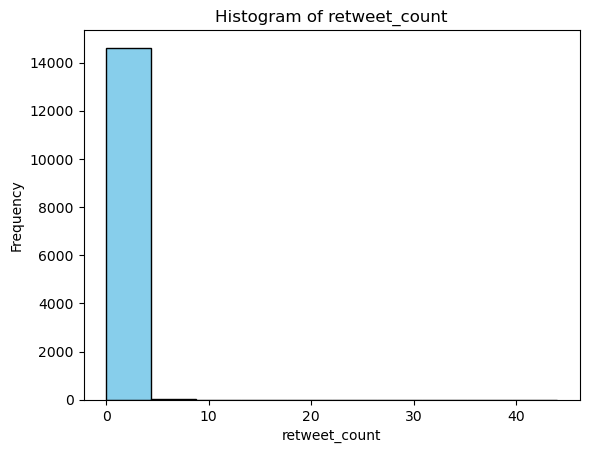

In [13]:
for column in Tweets_df.columns:
    if pd.api.types.is_numeric_dtype(Tweets_df[column]):
        plt.figure()  # Create a new figure for each histogram
        plt.hist(Tweets_df[column], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

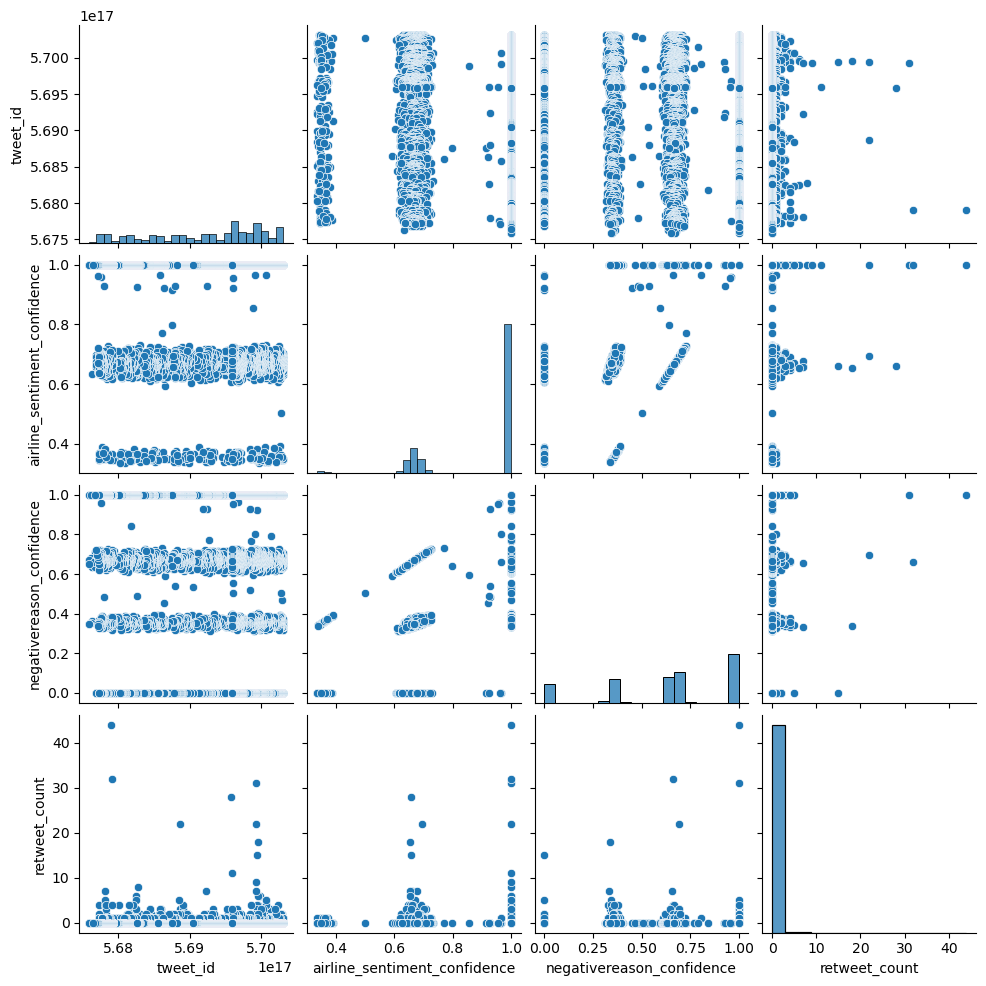

In [14]:
numerical_columns = Tweets_df.select_dtypes(include=['int64', 'float64'])
sns.pairplot(numerical_columns)
plt.show()

/var/folders/pn/1vmw2q6n1l13nrvxqln1cmzc0000gn/T/ipykernel_3414/586653490.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Tweets_df.corr()


                              tweet_id  airline_sentiment_confidence  \
tweet_id                      1.000000                      0.024840   
airline_sentiment_confidence  0.024840                      1.000000   
negativereason_confidence     0.021533                      0.685879   
retweet_count                -0.008852                      0.012581   

                              negativereason_confidence  retweet_count  
tweet_id                                       0.021533      -0.008852  
airline_sentiment_confidence                   0.685879       0.012581  
negativereason_confidence                      1.000000       0.021574  
retweet_count                                  0.021574       1.000000  


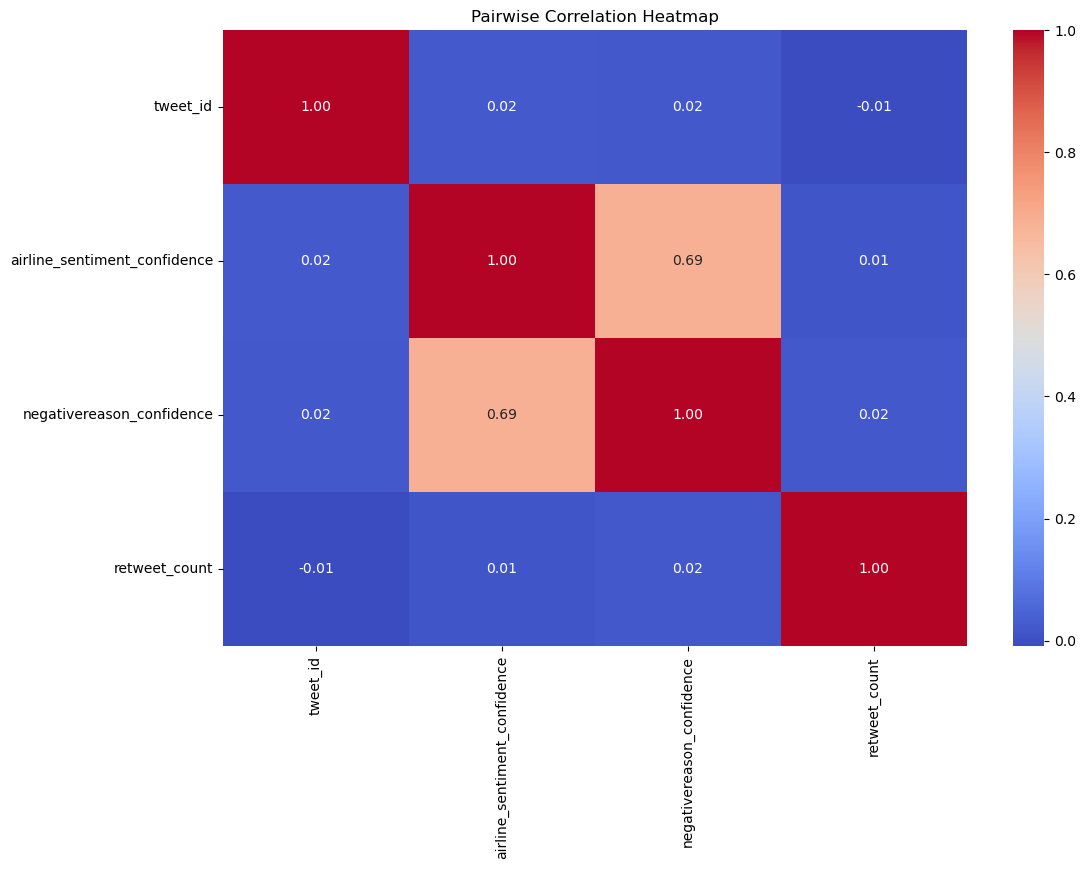

In [15]:
correlation_matrix = Tweets_df.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pairwise Correlation Heatmap")
plt.show()

In [16]:
Tweets_df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

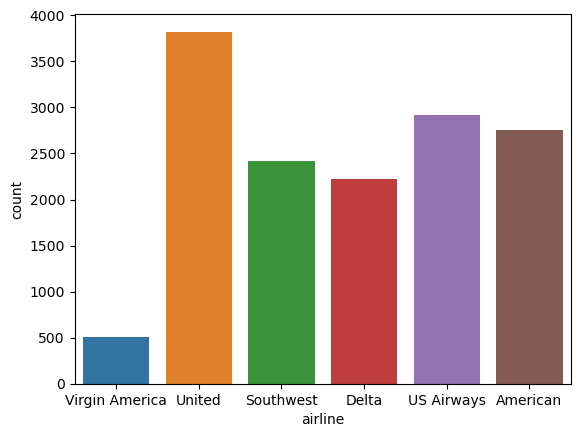

In [17]:
sns.countplot(data=Tweets_df,x="airline")
plt.show()

In [18]:
Tweets_df.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis=1,inplace=True)

In [19]:
Tweets_df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [20]:
Tweets_df.drop_duplicates(inplace=True)

In [21]:
Tweets_df.dropna(inplace=True)

In [22]:
Tweets_df.shape

(14452, 2)

In [23]:
Tweets_df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [24]:
Tweets_df["airline_sentiment"].value_counts()/len(Tweets_df["airline_sentiment"])
#Percenatges

negative    0.628771
neutral     0.212220
positive    0.159009
Name: airline_sentiment, dtype: float64

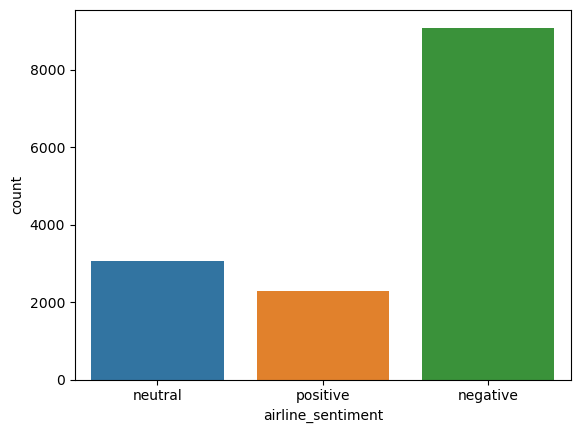

In [25]:
sns.countplot(data=Tweets_df, x="airline_sentiment")
plt.show()

In [26]:
#maxi length of a tweet in a text
maxi_length=Tweets_df.text.apply(len)
maxi_length.max()

229

In [27]:
mini_length=Tweets_df.text.str.len()
mini_length.min()

12

In [28]:
pd.DataFrame(Tweets_df.text.apply(len).describe())

,text
count,14452.000000
mean,104.413161
std,35.970821
min,12.000000
25%,78.000000
50%,115.000000
75%,136.000000
max,229.000000


Preprocessing  

In [29]:
pip install punkt

ERROR: Could not find a version that satisfies the requirement punkt (from versions: none)
ERROR: No matching distribution found for punkt
Note: you may need to restart the kernel to use updated packages.


In [30]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [34]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/areebafarooqui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/areebafarooqui/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

A stemmer instance is an object or component in natural language processing (NLP) used to perform stemming, which reduces words to their base or root form. It's typically part of an NLP library and follows specific rules or algorithms to transform words by removing suffixes, simplifying text data for analysis.

In [35]:
stemmer = PorterStemmer()

In [36]:
# Modifying the preprocess_text function to include stemming
def preprocess_text(text):
    # Remove special characters, URLs, and user mentions
    text = ' '.join(word for word in word_tokenize(text) if not word.startswith('@') and word.isalnum())
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    text = ' '.join(word for word in words if word not in stop_words)
    # Apply stemming to each word
    words = word_tokenize(text)
    text = ' '.join(stemmer.stem(word) for word in words)
    return text

# Assuming 'df' is your DataFrame with a 'text' column
Tweets_df['text'] = Tweets_df['text'].apply(preprocess_text)

In [37]:
Tweets_df

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plu ad commerci experi tacki
2,neutral,virginamerica today must mean need take anoth ...
3,negative,virginamerica realli aggress blast obnoxi ente...
4,negative,virginamerica realli big bad thing
...,...,...
14635,positive,americanair thank got differ flight chicago
14636,negative,americanair leav 20 minut late flight warn com...
14637,neutral,americanair pleas bring american airlin blackb...
14638,negative,americanair money chang flight answer phone su...


In [38]:
Tweets_df["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [40]:
mapping = {"negative": 0, 'neutral': 1, "positive": 2}
Tweets_df["airline_sentiment"] = Tweets_df["airline_sentiment"].map(mapping)

In [42]:
Tweets_df.head(3)

,airline_sentiment,text
0,1,virginamerica dhepburn said
1,2,virginamerica plu ad commerci experi tacki
2,1,virginamerica today must mean need take anoth ...


In [43]:
X=Tweets_df["text"]
y=Tweets_df["airline_sentiment"]

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [45]:
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(X)
feature_names = count_vectorizer.get_feature_names_out()

In [46]:
X=pd.DataFrame(X_counts.toarray())

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [48]:
print(f'shape of X_train {X_train.shape} & shape of y_train {y_train.shape}')
print(f'shape of X_test {X_test.shape} & shape of y_test {y_test.shape}')

shape of X_train (10116, 10625) & shape of y_train (10116,)
shape of X_test (4336, 10625) & shape of y_test (4336,)


In [49]:
bayes = MultinomialNB(alpha=0.45833).fit(X_train, y_train)

In [50]:
bayes_pred=bayes.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
accuracy_score(y_test,bayes_pred)

0.7615313653136532

In [53]:
print(classification_report(y_test, bayes_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2723
           1       0.60      0.49      0.54       934
           2       0.69      0.61      0.64       679

    accuracy                           0.76      4336
   macro avg       0.70      0.66      0.68      4336
weighted avg       0.75      0.76      0.75      4336



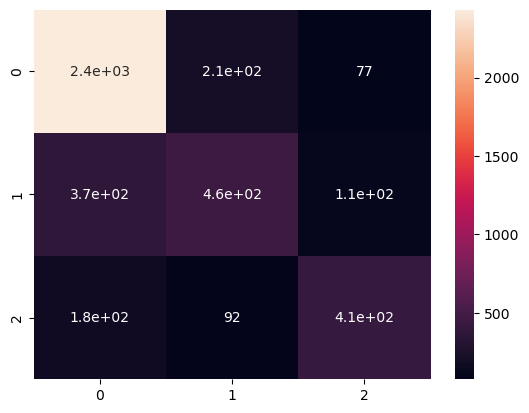

In [54]:
sns.heatmap(confusion_matrix(y_test, bayes_pred),  annot=True)
plt.show()